<a href="https://colab.research.google.com/github/VarshaChanumolu/Prediction-of-Online-News-Popularity---Classification-Regression/blob/main/Prediction%20of%20Online%20News%20Popularity_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [ ]:
Onews = pd.read_csv('OnlineNewsPopularity.csv')
Onews.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
Onews.columns = Onews.columns.str.replace(' ', '')

In [ ]:
Onews['timedelta'].value_counts()

91.0     104
72.0     102
84.0     101
59.0      99
29.0      99
        ... 
376.0     15
375.0     15
656.0     15
730.0     12
8.0        8
Name: timedelta, Length: 724, dtype: int64

In [ ]:
Onews = Onews.drop(['url'], axis = 1)

In [ ]:
Onews.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
Onews.describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


In [ ]:
Onews['n_tokens_content'].value_counts()

0.0       1181
286.0      101
225.0       86
335.0       86
279.0       85
          ... 
1933.0       1
2039.0       1
2196.0       1
1956.0       1
2150.0       1
Name: n_tokens_content, Length: 2406, dtype: int64

n_tokens_content ----->>> the tokens present in the article ... cannot be 0

In [ ]:
Onews = Onews[Onews['n_tokens_content'] != 0]
Onews.shape

(38463, 60)

In [ ]:
Onews.describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
timedelta,38463.0,360.385747,212.773031,8.000000,174.000000,347.000000,547.000000,731.000000
n_tokens_title,38463.0,10.382419,2.113800,2.000000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,38463.0,563.295375,468.299538,18.000000,259.000000,423.000000,729.000000,8474.000000
n_unique_tokens,38463.0,0.565049,3.573022,0.114964,0.477419,0.542986,0.611111,701.000000
n_non_stop_words,38463.0,1.027065,5.307978,1.000000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,38463.0,0.710336,3.312293,0.119134,0.632588,0.693727,0.756944,650.000000
num_hrefs,38463.0,11.217872,11.340580,0.000000,5.000000,8.000000,14.000000,304.000000
num_self_hrefs,38463.0,3.394769,3.869773,0.000000,1.000000,3.000000,4.000000,116.000000
num_imgs,38463.0,4.563061,8.295365,0.000000,1.000000,1.000000,4.000000,128.000000
num_videos,38463.0,1.263786,4.164896,0.000000,0.000000,0.000000,1.000000,91.000000


In [ ]:
Onews = Onews[Onews['kw_min_min'] != -1]
Onews.shape

(16549, 60)

In [ ]:
Onews.describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
timedelta,16549.0,573.418998,9.463565e+01,255.000000,491.000000,574.000000,658.000000,731.000000
n_tokens_title,16549.0,9.873225,1.978889e+00,2.000000,9.000000,10.000000,11.000000,18.000000
n_tokens_content,16549.0,510.652245,4.313354e+02,18.000000,232.000000,377.000000,654.000000,6336.000000
n_unique_tokens,16549.0,0.561936,1.076074e-01,0.123422,0.487805,0.558989,0.631902,1.000000
n_non_stop_words,16549.0,1.000000,4.458198e-09,1.000000,1.000000,1.000000,1.000000,1.000000
n_non_stop_unique_tokens,16549.0,0.706015,1.034092e-01,0.119134,0.642395,0.706638,0.772727,1.000000
num_hrefs,16549.0,10.834250,1.076652e+01,0.000000,5.000000,7.000000,13.000000,171.000000
num_self_hrefs,16549.0,3.510424,4.173201e+00,0.000000,1.000000,3.000000,4.000000,74.000000
num_imgs,16549.0,3.971841,7.895632e+00,0.000000,1.000000,1.000000,1.000000,99.000000
num_videos,16549.0,1.230890,4.270048e+00,0.000000,0.000000,0.000000,1.000000,75.000000


In [ ]:
OnewsN = Onews.drop(['self_reference_min_shares','self_reference_max_shares', 'self_reference_avg_sharess'], axis = 1)
OnewsN.shape

(16549, 57)

In [ ]:
OnewsN = OnewsN.drop(['is_weekend'], axis = 1)
OnewsN.shape

(16549, 56)

In [ ]:
OnewsN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16549 entries, 0 to 24284
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      16549 non-null  float64
 1   n_tokens_title                 16549 non-null  float64
 2   n_tokens_content               16549 non-null  float64
 3   n_unique_tokens                16549 non-null  float64
 4   n_non_stop_words               16549 non-null  float64
 5   n_non_stop_unique_tokens       16549 non-null  float64
 6   num_hrefs                      16549 non-null  float64
 7   num_self_hrefs                 16549 non-null  float64
 8   num_imgs                       16549 non-null  float64
 9   num_videos                     16549 non-null  float64
 10  average_token_length           16549 non-null  float64
 11  num_keywords                   16549 non-null  float64
 12  data_channel_is_lifestyle      16549 non-null 

In [ ]:
def outliers(df, columns = None):
    if not columns:
        columns = df.columns
    
    for c in columns:
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1
        floor, ceil = Q1 - 1.5*IQR, Q3 + 1.5*IQR
        
        df = df[(df[c] >= floor) & (df[c] <= ceil)]
    return df

In [ ]:
OnewsNew = outliers(OnewsN,['shares'])

In [ ]:
OnewsNew.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
OnewsN.shape

(16549, 56)

In [ ]:
OnewsNew.shape

(14726, 56)

In [ ]:
import seaborn as sns

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shares'>

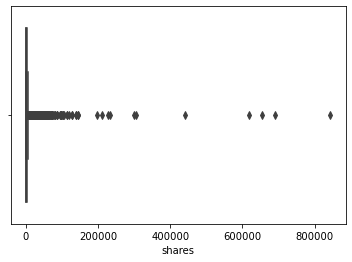

In [ ]:
sns.boxplot(OnewsN['shares'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shares'>

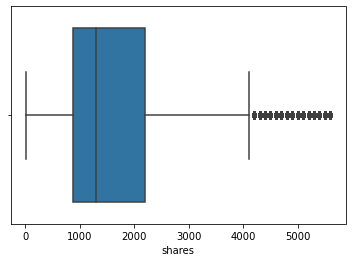

In [ ]:
sns.boxplot(OnewsNew['shares'])

In [ ]:
OnewsNew1 = outliers(OnewsNew, ['shares'])

In [ ]:
OnewsNew1.shape

(13884, 56)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shares'>

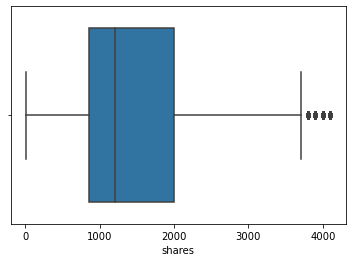

In [ ]:
sns.boxplot(OnewsNew1['shares'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='shares', ylabel='Density'>

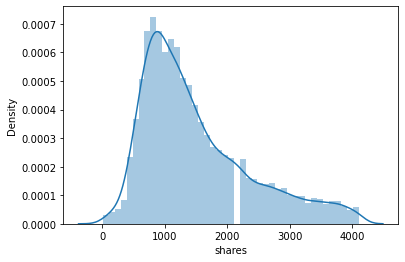

In [ ]:
sns.distplot(OnewsNew1['shares'])

In [ ]:
OnewsNew2 = outliers(OnewsNew1, ['shares'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shares'>

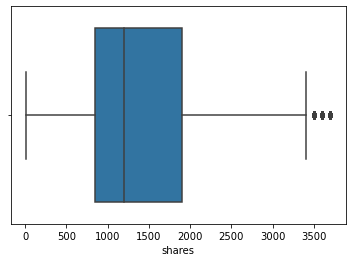

In [ ]:
sns.boxplot(OnewsNew2['shares'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='shares', ylabel='Density'>

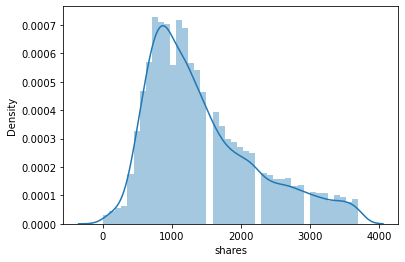

In [ ]:
sns.distplot(OnewsNew2['shares'])

In [ ]:
OnewsNew2.shape, OnewsNew1.shape

((13554, 56), (13884, 56))

In [ ]:
OnewsNew1['shares'].mean()

1501.919259579372

In [ ]:
OnewsNew1.describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
timedelta,13884.0,574.076347,9.450100e+01,255.000000,492.000000,575.000000,658.000000,731.000000
n_tokens_title,13884.0,9.891242,1.968706e+00,2.000000,9.000000,10.000000,11.000000,18.000000
n_tokens_content,13884.0,502.230697,4.137703e+02,21.000000,234.000000,377.500000,644.250000,5530.000000
n_unique_tokens,13884.0,0.562650,1.058356e-01,0.123422,0.489585,0.558715,0.630239,1.000000
n_non_stop_words,13884.0,1.000000,4.349938e-09,1.000000,1.000000,1.000000,1.000000,1.000000
n_non_stop_unique_tokens,13884.0,0.706973,1.016983e-01,0.119134,0.644144,0.707356,0.772108,1.000000
num_hrefs,13884.0,10.502449,1.027606e+01,0.000000,5.000000,7.000000,13.000000,171.000000
num_self_hrefs,13884.0,3.507851,4.097266e+00,0.000000,1.000000,3.000000,4.000000,74.000000
num_imgs,13884.0,3.803299,7.649840e+00,0.000000,1.000000,1.000000,1.000000,99.000000
num_videos,13884.0,1.142322,4.111767e+00,0.000000,0.000000,0.000000,1.000000,75.000000


In [ ]:
OnewsNew1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13884 entries, 0 to 24284
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      13884 non-null  float64
 1   n_tokens_title                 13884 non-null  float64
 2   n_tokens_content               13884 non-null  float64
 3   n_unique_tokens                13884 non-null  float64
 4   n_non_stop_words               13884 non-null  float64
 5   n_non_stop_unique_tokens       13884 non-null  float64
 6   num_hrefs                      13884 non-null  float64
 7   num_self_hrefs                 13884 non-null  float64
 8   num_imgs                       13884 non-null  float64
 9   num_videos                     13884 non-null  float64
 10  average_token_length           13884 non-null  float64
 11  num_keywords                   13884 non-null  float64
 12  data_channel_is_lifestyle      13884 non-null 

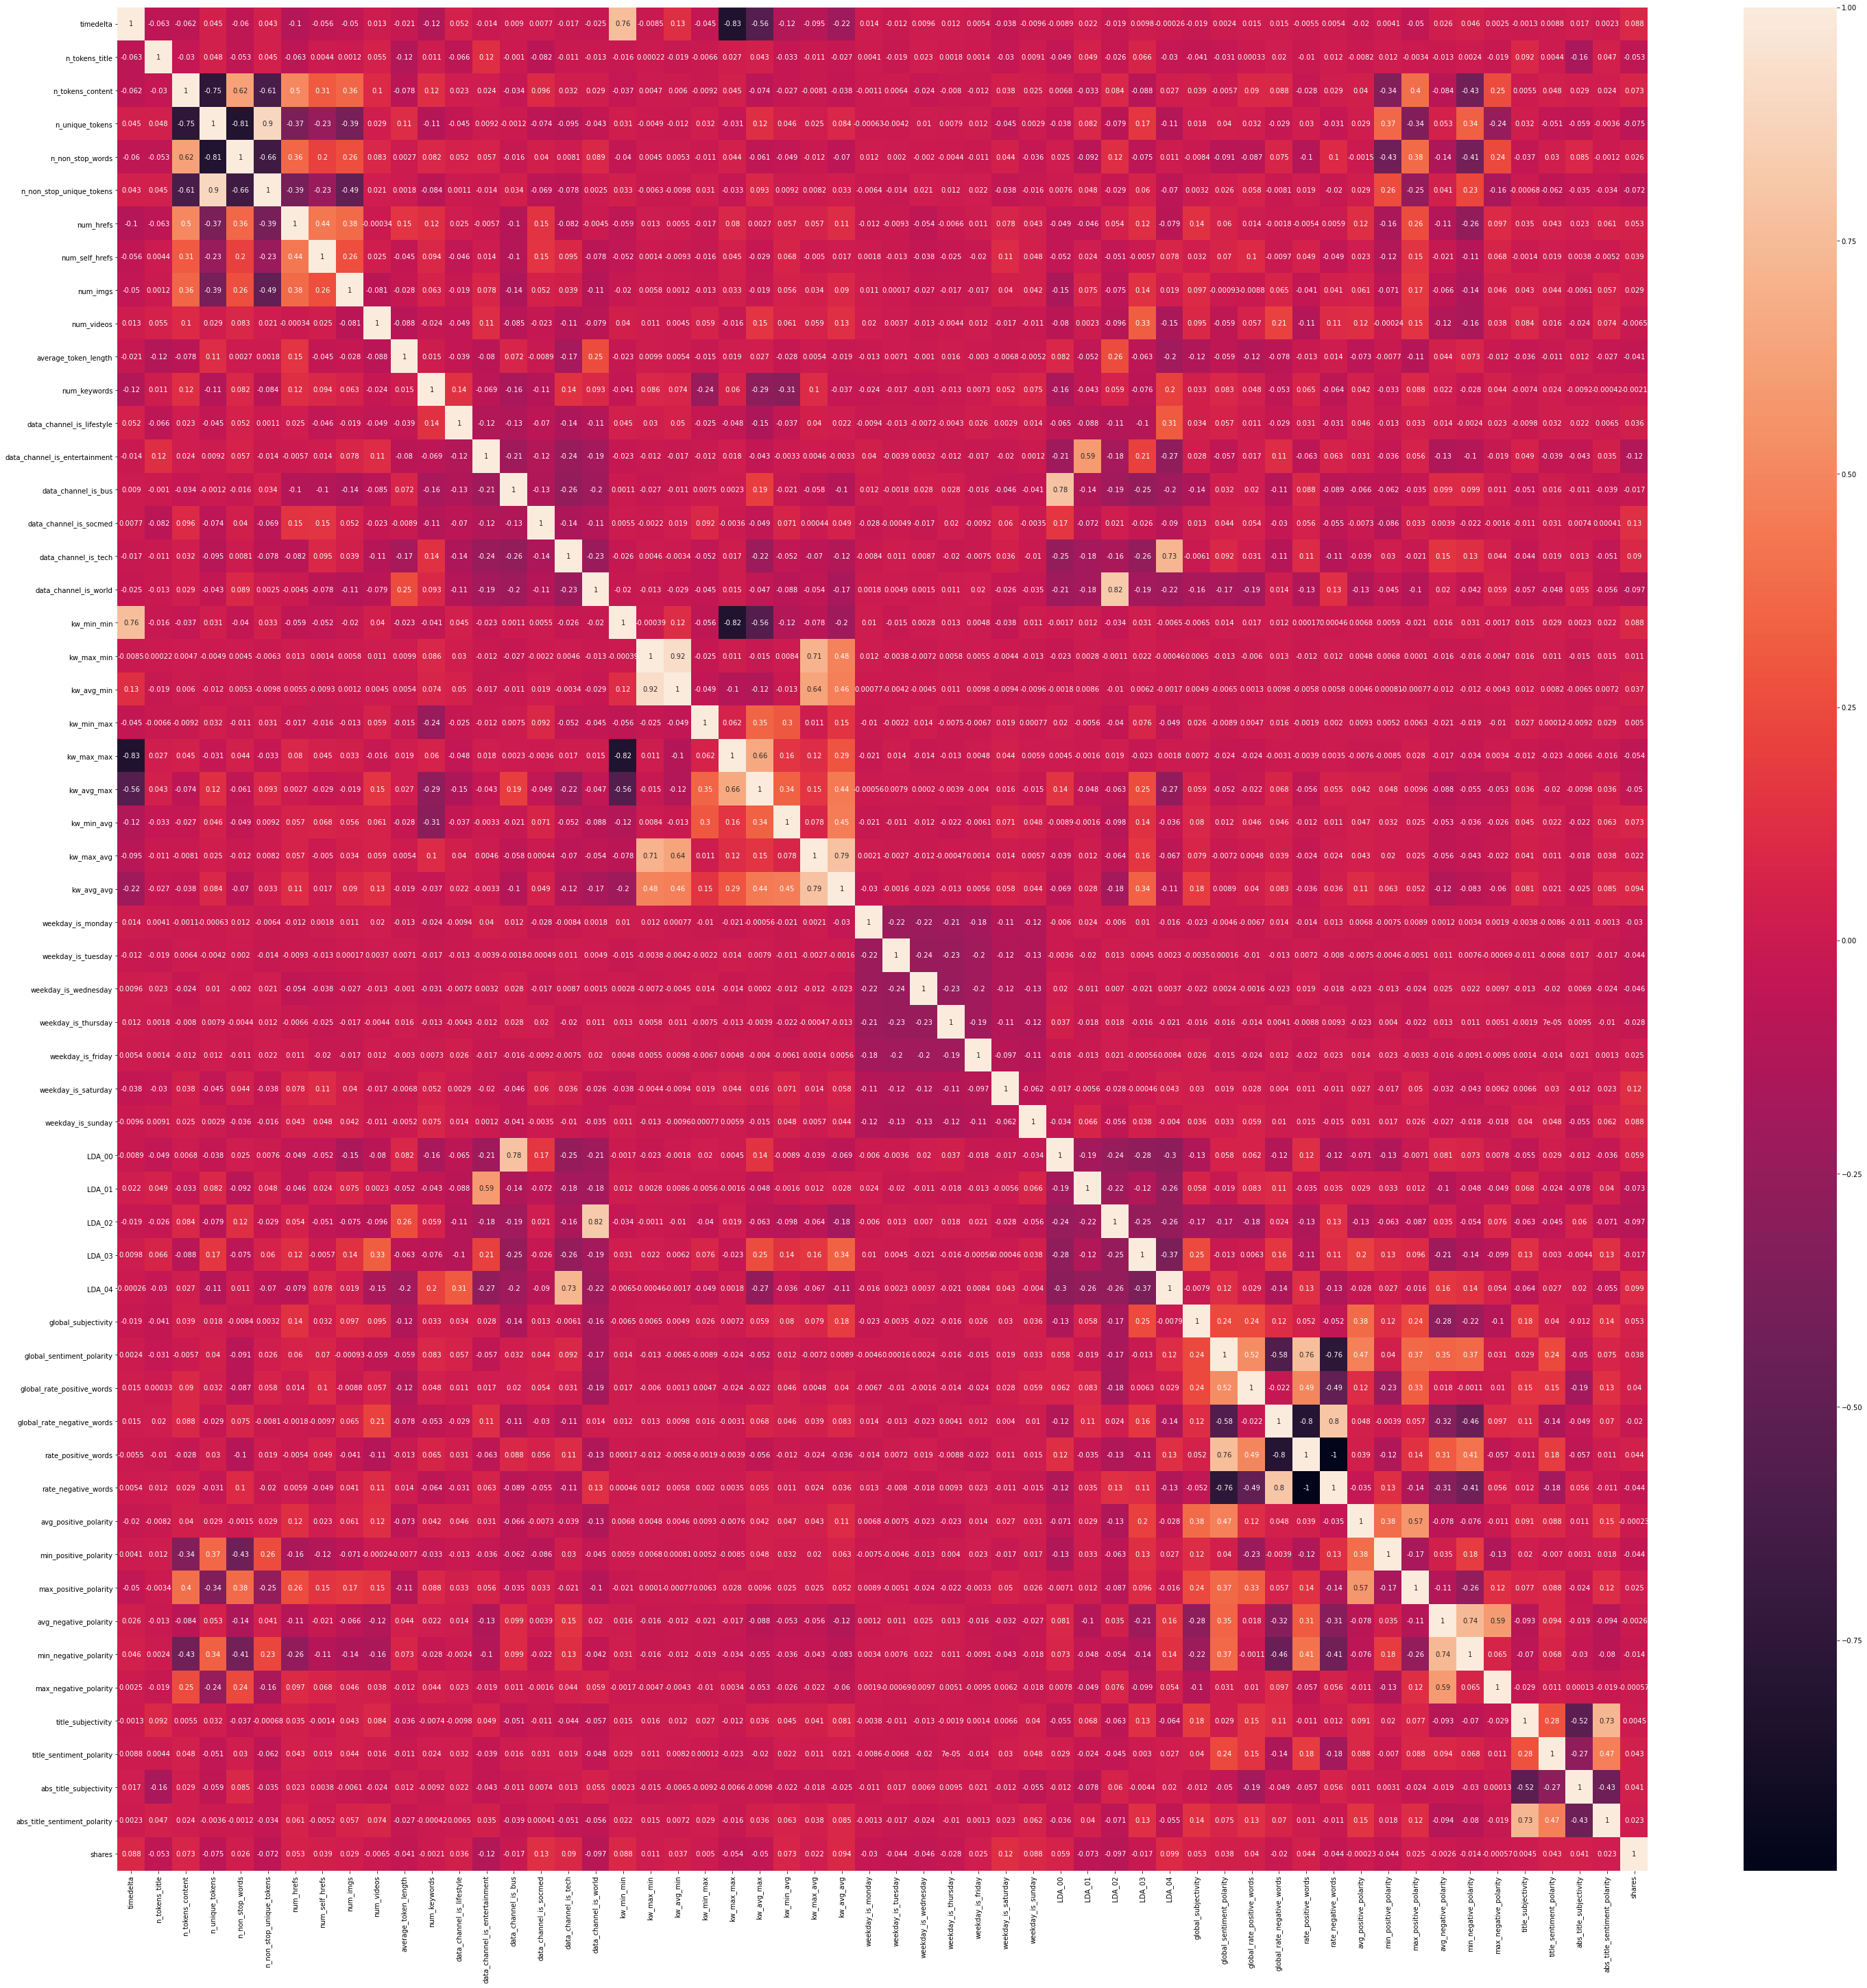

In [ ]:
plt.figure(figsize = (50, 50))

sns.heatmap(OnewsNew2.corr(), annot = True)
plt.show()

In [ ]:
##col = ['n_tokens_content','n_unique_tokens', 'n_non_stop_words',
 #      'n_non_stop_unique_tokens','average_token_length', 'kw_min_min',
  #     'kw_max_min','kw_avg_min','kw_min_max','kw_max_max', 'kw_avg_max',
  #     'kw_min_avg','kw_max_avg','kw_avg_avg','self_reference_min_shares',
  #     'self_reference_max_shares','global_sentiment_polarity',
  #     'global_rate_positive_words','global_rate_negative_words',
  #     'avg_positive_polarity','min_positive_polarity','max_positive_polarity',
  #     'avg_negative_polarity','min_negative_polarity',
   #    'max_negative_polarity', 'abs_title_subjectivity',
   #    'abs_title_sentiment_polarity','data_channel_is_lifestyle','data_channel_is_tech',
   #    'data_channel_is_entertainment','data_channel_is_bus',
   #    'data_channel_is_socmed','data_channel_is_world',
  #     'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday',
   #    'weekday_is_thursday','weekday_is_friday','weekday_is_saturday',
   #    'weekday_is_sunday','is_weekend','LDA_00','LDA_01','LDA_02',
    #   'LDA_03','LDA_04'
   #   ]

col = ['n_tokens_content', 
      'n_unique_tokens',
      'kw_max_max', 'kw_max_min', 'kw_max_avg',
      'rate_positive_words', 'rate_negative_words',
      'avg_negative_polarity','avg_positive_polarity','title_subjectivity']

OnewsNew3 = OnewsNew2.drop(col, axis = 1)

In [ ]:
OnewsNew3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13554 entries, 0 to 24284
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      13554 non-null  float64
 1   n_tokens_title                 13554 non-null  float64
 2   n_non_stop_words               13554 non-null  float64
 3   n_non_stop_unique_tokens       13554 non-null  float64
 4   num_hrefs                      13554 non-null  float64
 5   num_self_hrefs                 13554 non-null  float64
 6   num_imgs                       13554 non-null  float64
 7   num_videos                     13554 non-null  float64
 8   average_token_length           13554 non-null  float64
 9   num_keywords                   13554 non-null  float64
 10  data_channel_is_lifestyle      13554 non-null  float64
 11  data_channel_is_entertainment  13554 non-null  float64
 12  data_channel_is_bus            13554 non-null 

col = ['n_tokens_content','n_unique_tokens', 'n_non_stop_words',
       'n_non_stop_unique_tokens','average_token_length', 'kw_min_min',
       'kw_max_min','kw_avg_min','kw_min_max','kw_max_max', 'kw_avg_max',
       'kw_min_avg','kw_max_avg','kw_avg_avg','self_reference_min_shares',
       'self_reference_max_shares','global_sentiment_polarity',
       'global_rate_positive_words','global_rate_negative_words',
       'avg_positive_polarity','min_positive_polarity','max_positive_polarity',
       'avg_negative_polarity','min_negative_polarity',
       'max_negative_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']
       
OnewsNew4 = OnewsNew2.drop(col, axis = 1)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='shares', ylabel='Density'>

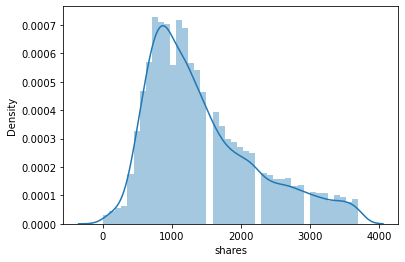

In [ ]:
sns.distplot(OnewsNew3['shares'])

In [ ]:
OnewsNew3['shares'].mean(), OnewsNew3['shares'].median(), OnewsNew3['shares'].min(), OnewsNew3['shares'].max()

(1442.6624612660469, 1200.0, 8, 3700)

In [ ]:
OnewsNew4['popular'] = [1 if x >= 1200 else 0 for x in OnewsNew4['shares']]
OnewsNew4.head()

,n_tokens_title,num_hrefs,num_self_hrefs,num_imgs,num_videos,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,rate_positive_words,rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,popular
0,12.0,4.0,2.0,1.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.769231,0.230769,0.500000,-0.187500,593,0
1,9.0,3.0,1.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.733333,0.266667,0.000000,0.000000,711,0
2,9.0,3.0,1.0,1.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.857143,0.142857,0.000000,0.000000,1500,1
3,9.0,9.0,0.0,1.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.666667,0.333333,0.000000,0.000000,1200,1
4,13.0,19.0,19.0,20.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.860215,0.139785,0.454545,0.136364,505,0


In [ ]:
OnewsNew3['popular'] = [1 if x >= 1200 else 0 for x in OnewsNew3['shares']]
OnewsNew2.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popular
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,1
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


In [ ]:
OnewsNew3['popular'].value_counts()

1    7416
0    6138
Name: popular, dtype: int64

In [ ]:
OnewsNew3.describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
timedelta,13554.0,574.045374,9.453821e+01,255.000000,492.000000,575.000000,658.000000,731.000000
n_tokens_title,13554.0,9.894127,1.968562e+00,2.000000,9.000000,10.000000,11.000000,18.000000
n_non_stop_words,13554.0,1.000000,4.362946e-09,1.000000,1.000000,1.000000,1.000000,1.000000
n_non_stop_unique_tokens,13554.0,0.707145,1.016779e-01,0.119134,0.644258,0.707291,0.772242,1.000000
num_hrefs,13554.0,10.480449,1.025021e+01,0.000000,5.000000,7.000000,13.000000,171.000000
num_self_hrefs,13554.0,3.510108,4.108586e+00,0.000000,1.000000,3.000000,4.000000,74.000000
num_imgs,13554.0,3.804338,7.660620e+00,0.000000,1.000000,1.000000,1.000000,99.000000
num_videos,13554.0,1.150804,4.138973e+00,0.000000,0.000000,0.000000,1.000000,75.000000
average_token_length,13554.0,4.671421,2.795354e-01,3.660900,4.482594,4.652201,4.838470,6.250689
num_keywords,13554.0,7.308470,1.908775e+00,1.000000,6.000000,7.000000,9.000000,10.000000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = OnewsNew3.drop(['shares','popular'], axis = 1)
Y = OnewsNew3[['popular']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state = 100)

In [ ]:
X4 = OnewsNew4.drop(['shares','popular'], axis = 1)
Y4 = OnewsNew4[['popular']]

X_train4, X_test4, y_train4, y_test4 = train_test_split(X, Y, train_size = 0.7, random_state = 100)

In [ ]:
X_train.shape, X_test.shape# X_train4.shape

((9487, 55), (4067, 55))

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

In [ ]:
f1_score(y_test, y_pred) 

0.6019549897704024

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53      1874
           1       0.60      0.60      0.60      2193

    accuracy                           0.57      4067
   macro avg       0.57      0.57      0.57      4067
weighted avg       0.57      0.57      0.57      4067



In [ ]:
dtree.score(X_train, y_train)

1.0

In [ ]:
dtree.score(X_test, y_test)

0.5694615195475781

In [ ]:
dtree.fit(X_train4, y_train4)
y_pred = dtree.predict(X_test4)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      5002
           1       0.51      0.51      0.51      4549

    accuracy                           0.53      9551
   macro avg       0.53      0.53      0.53      9551
weighted avg       0.53      0.53      0.53      9551



In [ ]:
from sklearn.model_selection import cross_val_score,RepeatedKFold,GridSearchCV

In [ ]:
dtree = DecisionTreeClassifier()

cv = RepeatedKFold(n_splits = 100, n_repeats = 2)
grid = {}
grid['min_samples_leaf'] = np.arange(45,65, 5) # the number of samples to be present in the leaf
grid['max_features'] = np.arange(4, 8, 1)

search = GridSearchCV(dtree, grid, scoring = "neg_mean_absolute_error", cv = cv, n_jobs = -1)
res = search.fit(X, Y)

In [ ]:
search.best_estimator_

DecisionTreeClassifier(max_features=7, min_samples_leaf=60)

In [ ]:
dtreeBest = search.best_estimator_
dtreeBest.fit(X_train, y_train)
y_pred = dtreeBest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.55      0.56      1874
           1       0.63      0.66      0.65      2193

    accuracy                           0.61      4067
   macro avg       0.61      0.61      0.61      4067
weighted avg       0.61      0.61      0.61      4067



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfclf = RandomForestClassifier(n_estimators = 40)

rfclf.fit(X_train, y_train)
y_pred = rfclf.predict(X_test)
print(classification_report(y_test, y_pred))

NameError: ignored

In [ ]:
rfclf = RandomForestClassifier()

cv = RepeatedKFold(n_splits = 100, n_repeats = 2)
grid = {}
grid['n_estimators'] = np.arange(60, 81, 10)
#grid['min_samples_leaf'] = np.arange(40, 65, 5)

search = GridSearchCV(rfclf, grid, scoring = "neg_mean_absolute_error", cv = cv, n_jobs = -1)
res = search.fit(X, Y)


In [ ]:
search.best_estimator_

In [ ]:
rfclfBest = search.best_estimator_
rfclfBest.fit(X_train, y_train)
y_pred = rfclfBest.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
rfclf = RandomForestClassifier(n_estimators = 110)
rfclf.fit(X_train, y_train)
y_pred = rfclf.predict(X_test)
print(classification_report(y_test, y_pred))

## KNN

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scale = MinMaxScaler()

In [ ]:
X_train = scale.fit_transform(X_train) # fit the data and then transform it
X_test = scale.transform(X_test) # find the min and max and then later scale it

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, plot_roc_curve

In [ ]:
knnclf = KNeighborsClassifier(n_neighbors = 31)
knnclf.fit(X_train, y_train)
y_pred = knnclf.predict(X_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58      1874
           1       0.64      0.66      0.65      2193

    accuracy                           0.62      4067
   macro avg       0.61      0.61      0.61      4067
weighted avg       0.62      0.62      0.62      4067



In [ ]:
knnclf = KNeighborsClassifier(metric = "manhattan")

cv = RepeatedKFold(n_splits = 100, n_repeats = 2)
grid = {}
grid['n_neighbors'] = np.arange(41, 80, 11)

search = GridSearchCV(knnclf, grid, scoring = "neg_mean_absolute_error", cv = cv, n_jobs = -1)
res = search.fit(X, Y)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
search.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=63)

In [ ]:
knnclfBest = search.best_estimator_
knnclfBest.fit(X_train, y_train)
y_pred = knnclfBest.predict(X_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.58      0.59      1874
           1       0.65      0.65      0.65      2193

    accuracy                           0.62      4067
   macro avg       0.62      0.62      0.62      4067
weighted avg       0.62      0.62      0.62      4067



In [ ]:
knnclf = KNeighborsClassifier(metric = "manhattan", n_neighbors = 69)
knnclf.fit(X_train, y_train)
y_pred = knnclf.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.59      0.58      0.59      1874
           1       0.65      0.65      0.65      2193

    accuracy                           0.62      4067
   macro avg       0.62      0.62      0.62      4067
weighted avg       0.62      0.62      0.62      4067



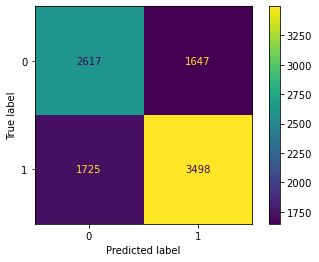

In [ ]:
plot_confusion_matrix(knnclf, X_train, y_train)

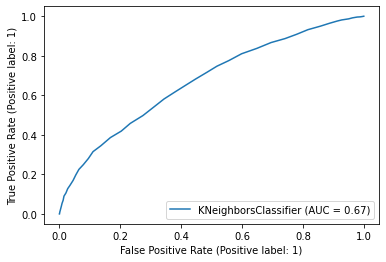

In [ ]:
plot_roc_curve(knnclf, X_test, y_test)

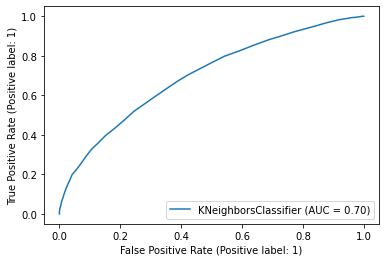

In [ ]:
plot_roc_curve(knnclf, X_train, y_train)